# surname-origin // Notebook Demo

This is a demo notebook for a PyTorch implementation of a vanilla RNN character model that classifies the country of origin of a given surname.

Before starting we'll need to append the `'./src'` path to `sys.path` so that we can import the source code, if we're running this notebook from the root directory.

In [1]:
import sys
import os

sys.path.append(os.path.join('.', 'src'))

In [2]:
# Import modules from src directory.
import app
import utils

import matplotlib.pyplot as plt
%matplotlib inline

First, extract the names for different languages (each language with its own distinct `.txt` file) from `./data/names`, using the `utils.TextFileLoader` class. Then generate a dictionary of the data using its `.createDict()` method.

In [3]:
loader = utils.TextFileLoader(os.path.join('data', 'names'))
data = loader.createDict()

# Print the first ten surnames of the dataset designated as Greek.
print(data['Greek'][:10])

['Adamidis', 'Adamou', 'Agelakos', 'Akrivopoulos', 'Alexandropoulos', 'Anetakis', 'Angelopoulos', 'Antimisiaris', 'Antipas', 'Antonakos']


Then load this data into the `src.ModelHandler` class. We need to specify a string containing each of the allowed ASCII characters (which can be pulled from a static variable in `utils.TextFileLoader`), along with the number of hidden layers for the RNN model.

In [4]:
handler = app.ModelHandler(data, loader.all_letters, n_hidden=128)

# Print allowed characters.
print('Allowed characters for model: {}'.format(loader.all_letters))

Allowed characters for model: abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'


Now we train the model. It'll pick a random name from the training set along with its ground truth language to conduct backprop with for a defined number of iterations.

In [5]:
losses = handler.train(n_iter=10000, learning_rate=0.005)
y_raw = [i[1] for i in losses]

Completed training step 1
Completed training step 101
Completed training step 201
Completed training step 301
Completed training step 401
Completed training step 501
Completed training step 601
Completed training step 701
Completed training step 801
Completed training step 901
Completed training step 1001
Completed training step 1101
Completed training step 1201
Completed training step 1301
Completed training step 1401
Completed training step 1501
Completed training step 1601
Completed training step 1701
Completed training step 1801
Completed training step 1901
Completed training step 2001
Completed training step 2101
Completed training step 2201
Completed training step 2301
Completed training step 2401
Completed training step 2501
Completed training step 2601
Completed training step 2701
Completed training step 2801
Completed training step 2901
Completed training step 3001
Completed training step 3101
Completed training step 3201
Completed training step 3301
Completed training step 34

Now we can plot a moving average of the loss on each training example for each iteration.

In [9]:
def moving_average(y_array, n_average=10):
    # Initialise iteration number list, moving average list, and counter utility variable.
    iter_x = list()
    average_y = list()
    i = 0
    
    try:
        while True:
            sample_i = y_array[i*n_average : (i+1)*n_average]
            avg_i = sum(sample_i) / float(len(sample_i))
            average_y.append(avg_i)
            iter_x.append(i * n_average + 1)
            i += 1
    except(IndexError, ZeroDivisionError) as e:
        return iter_x, average_y

In [12]:
# Process a 100-step moving average of the training results.
x, y = moving_average(y_raw, n_average=100)

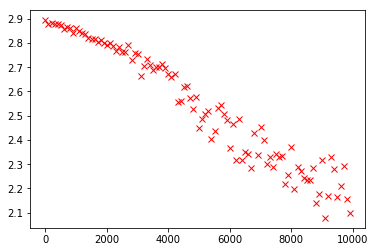

In [13]:
plt.plot(x, y, 'rx')

We can see here a reduction in the loss on the prediction of each training sample upon successive training iterations of the network, albeit with an increasing variance.